 # 1. Adjusting Base Landsat LST in reference to MODIS LST through Quantile Transformation:

In [14]:
# Step 1: Load the necessary libraries and datasets
import pandas as pd
import numpy as np

# Load Landsat and MODIS datasets from Excel files
landsat_df = pd.read_excel(r'C:\Users\Redwan Kabir\Desktop\Landsat_30m_Values.xlsx')
modis_df = pd.read_excel(r'C:\Users\Redwan Kabir\Desktop\MODIS_1km_Values.xlsx')

# Step 2: Compute quantiles for both datasets
landsat_quantiles = np.percentile(landsat_df['grid_code'], np.linspace(0, 100, len(modis_df)))
modis_quantiles = np.percentile(modis_df['grid_code'], np.linspace(0, 100, len(modis_df)))

# Step 3: Map Landsat data values to MODIS quantiles
landsat_mapped = np.interp(landsat_df['grid_code'], landsat_quantiles, modis_quantiles)

# Step 4: Create a combined DataFrame
combined_df = pd.DataFrame({'Landsat_Values': landsat_df['grid_code'], 'Adjusted_landsat_Values': landsat_mapped})

# Step 5: Print the combined DataFrame
print(combined_df)

        Landsat_Values  Adjusted_landsat_Values
0            21.889872                37.489990
1            22.395622                37.960250
2            22.634371                38.170564
3            22.672764                38.209991
4            22.573868                38.130005
...                ...                      ...
665283       18.291443                34.161256
665284       19.104982                34.673165
665285       20.304514                35.968198
665286       21.257574                37.059526
665287       21.267317                37.070007

[665288 rows x 2 columns]


# 2. Visualizing the adjusted Landsat Data Distribution

        Landsat_Values  MODIS_Values  Adjusted_Landsat_Values
0            21.889872     34.510010                37.489990
1            22.395622     38.989990                37.960250
2            22.634371     39.429993                38.170564
3            22.672764     38.329987                38.209991
4            22.573868     36.790009                38.130005
...                ...           ...                      ...
665283       18.291443           NaN                34.161256
665284       19.104982           NaN                34.673165
665285       20.304514           NaN                35.968198
665286       21.257574           NaN                37.059526
665287       21.267317           NaN                37.070007

[665288 rows x 3 columns]


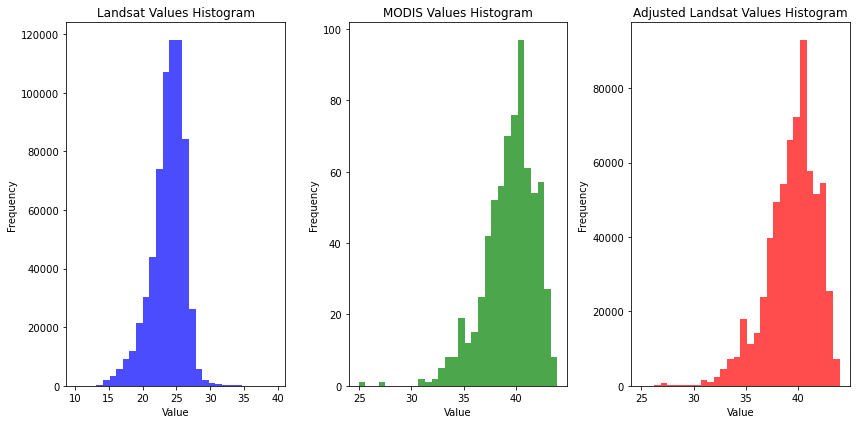

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Landsat and MODIS datasets from Excel files
landsat_df = pd.read_excel(r'C:\Users\Redwan Kabir\Desktop\Landsat_30m_Values.xlsx')
modis_df = pd.read_excel(r'C:\Users\Redwan Kabir\Desktop\MODIS_1km_Values.xlsx')

# Compute quantiles for both datasets
landsat_quantiles = np.percentile(landsat_df['grid_code'], np.linspace(0, 100, len(modis_df)))
modis_quantiles = np.percentile(modis_df['grid_code'], np.linspace(0, 100, len(modis_df)))

# Map Landsat data values to MODIS quantiles
landsat_mapped = np.interp(landsat_df['grid_code'], landsat_quantiles, modis_quantiles)

# Create a combined DataFrame
combined_df = pd.DataFrame({
    'Landsat_Values': landsat_df['grid_code'],
    'MODIS_Values': modis_df['grid_code'],
    'Adjusted_Landsat_Values': landsat_mapped
})

print(combined_df)

# Save the combined DataFrame to an Excel file
#combined_df.to_excel('Landsat_modis_conversion.xlsx', index=False)

# Create data charts and graphs for visualization
plt.figure(figsize=(12, 6))

# Histogram for Landsat Values
plt.subplot(131)
plt.hist(combined_df['Landsat_Values'], bins=30, color='blue', alpha=0.7)
plt.title('Landsat Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for MODIS Values
plt.subplot(132)
plt.hist(combined_df['MODIS_Values'], bins=30, color='green', alpha=0.7)
plt.title('MODIS Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for Adjusted Landsat Values
plt.subplot(133)
plt.hist(combined_df['Adjusted_Landsat_Values'], bins=30, color='red', alpha=0.7)
plt.title('Adjusted Landsat Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


**2.1 Visualization**

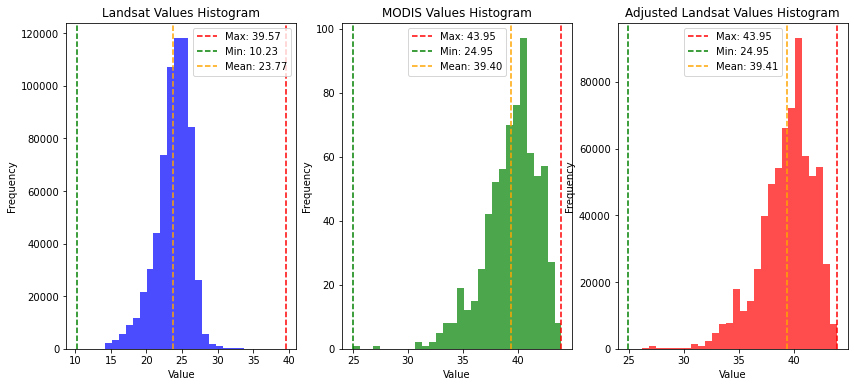

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


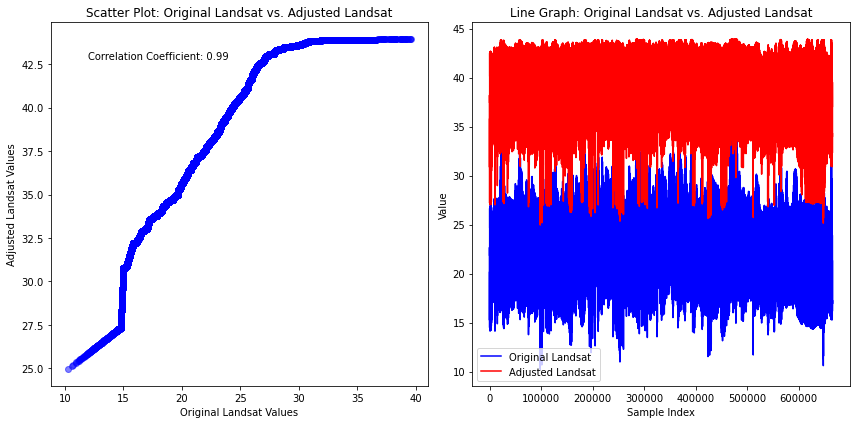

In [30]:
# Calculate max, min, and mean values
max_landsat = combined_df['Landsat_Values'].max()
min_landsat = combined_df['Landsat_Values'].min()
mean_landsat = combined_df['Landsat_Values'].mean()

max_modis = combined_df['MODIS_Values'].max()
min_modis = combined_df['MODIS_Values'].min()
mean_modis = combined_df['MODIS_Values'].mean()

max_adjusted = combined_df['Adjusted_Landsat_Values'].max()
min_adjusted = combined_df['Adjusted_Landsat_Values'].min()
mean_adjusted = combined_df['Adjusted_Landsat_Values'].mean()

# Create histograms with max, min, and mean values
plt.figure(figsize=(14, 6))

# Histogram for Landsat Values
plt.subplot(131)
plt.hist(combined_df['Landsat_Values'], bins=30, color='blue', alpha=0.7)
plt.axvline(x=max_landsat, color='red', linestyle='--', label=f'Max: {max_landsat:.2f}')
plt.axvline(x=min_landsat, color='green', linestyle='--', label=f'Min: {min_landsat:.2f}')
plt.axvline(x=mean_landsat, color='orange', linestyle='--', label=f'Mean: {mean_landsat:.2f}')
plt.title('Landsat Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram for MODIS Values
plt.subplot(132)
plt.hist(combined_df['MODIS_Values'], bins=30, color='green', alpha=0.7)
plt.axvline(x=max_modis, color='red', linestyle='--', label=f'Max: {max_modis:.2f}')
plt.axvline(x=min_modis, color='green', linestyle='--', label=f'Min: {min_modis:.2f}')
plt.axvline(x=mean_modis, color='orange', linestyle='--', label=f'Mean: {mean_modis:.2f}')
plt.title('MODIS Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Adjusted Landsat Values
plt.subplot(133)
plt.hist(combined_df['Adjusted_Landsat_Values'], bins=30, color='red', alpha=0.7)
plt.axvline(x=max_adjusted, color='red', linestyle='--', label=f'Max: {max_adjusted:.2f}')
plt.axvline(x=min_adjusted, color='green', linestyle='--', label=f'Min: {min_adjusted:.2f}')
plt.axvline(x=mean_adjusted, color='orange', linestyle='--', label=f'Mean: {mean_adjusted:.2f}')
plt.title('Adjusted Landsat Values Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Calculate the correlation coefficient between original Landsat and adjusted Landsat values
correlation_coefficient = pearsonr(combined_df['Landsat_Values'], combined_df['Adjusted_Landsat_Values'])[0]

# Create a scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(combined_df['Landsat_Values'], combined_df['Adjusted_Landsat_Values'], c='blue', alpha=0.5)
plt.title('Scatter Plot: Original Landsat vs. Adjusted Landsat')
plt.xlabel('Original Landsat Values')
plt.ylabel('Adjusted Landsat Values')

# Display correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# Create a line graph
plt.subplot(122)
plt.plot(landsat_df.index, combined_df['Landsat_Values'], label='Original Landsat', c='blue')
plt.plot(landsat_df.index, combined_df['Adjusted_Landsat_Values'], label='Adjusted Landsat', c='red')
plt.title('Line Graph: Original Landsat vs. Adjusted Landsat')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


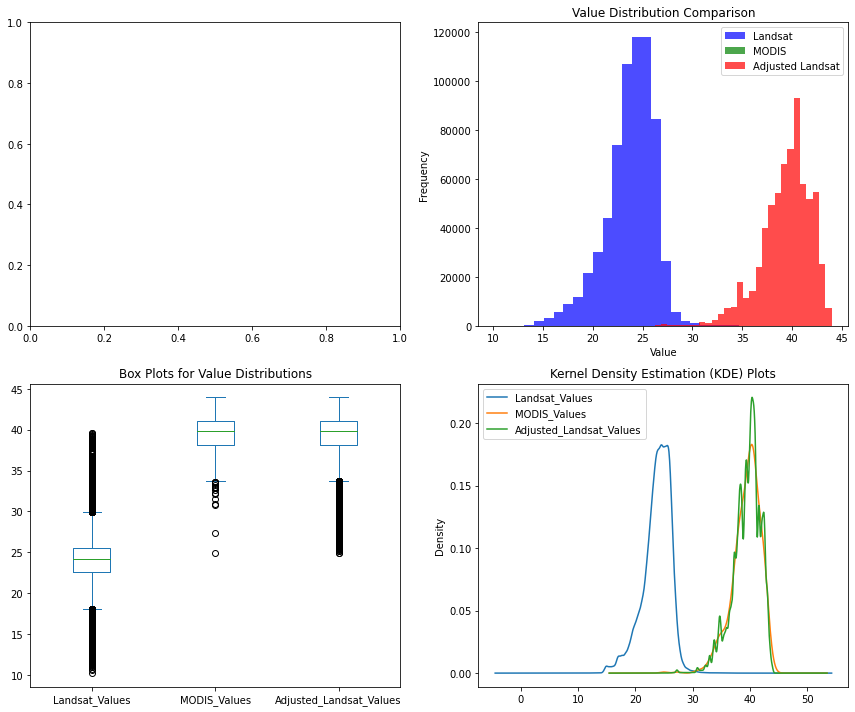

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the combined DataFrame (assuming it's already prepared)
combined_df = pd.read_excel(r'C:\Users\Redwan Kabir\Landsat_modis_conversion.xlsx')
                            
# Histograms for Landsat, MODIS, and Adjusted Landsat Values
axes[0, 1].hist(combined_df['Landsat_Values'], bins=30, color='blue', alpha=0.7, label='Landsat')
axes[0, 1].hist(combined_df['MODIS_Values'], bins=30, color='green', alpha=0.7, label='MODIS')
axes[0, 1].hist(combined_df['Adjusted_Landsat_Values'], bins=30, color='red', alpha=0.7, label='Adjusted Landsat')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Value Distribution Comparison')
axes[0, 1].legend()

# Box Plots for Landsat, MODIS, and Adjusted Landsat Values
combined_df[['Landsat_Values', 'MODIS_Values', 'Adjusted_Landsat_Values']].plot.box(ax=axes[1, 0])
axes[1, 0].set_title('Box Plots for Value Distributions')

# Kernel Density Estimation (KDE) Plots for Landsat, MODIS, and Adjusted Landsat Values
combined_df[['Landsat_Values', 'MODIS_Values', 'Adjusted_Landsat_Values']].plot.kde(ax=axes[1, 1])
axes[1, 1].set_title('Kernel Density Estimation (KDE) Plots')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


<Figure size 576x432 with 0 Axes>

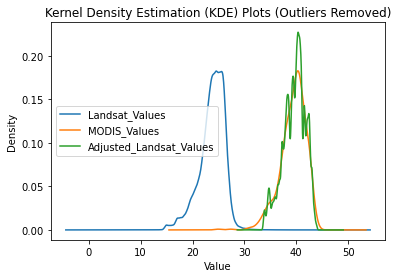

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Define a function to remove outliers using IQR method
def remove_outliers_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Remove outliers from the Adjusted Landsat Values
combined_df['Adjusted_Landsat_Values'] = remove_outliers_iqr(combined_df['Adjusted_Landsat_Values'])

# Create a new KDE plot after removing outliers
plt.figure(figsize=(8, 6))
combined_df[['Landsat_Values', 'MODIS_Values', 'Adjusted_Landsat_Values']].plot.kde()
plt.title('Kernel Density Estimation (KDE) Plots (Outliers Removed)')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the updated KDE plot
plt.show()


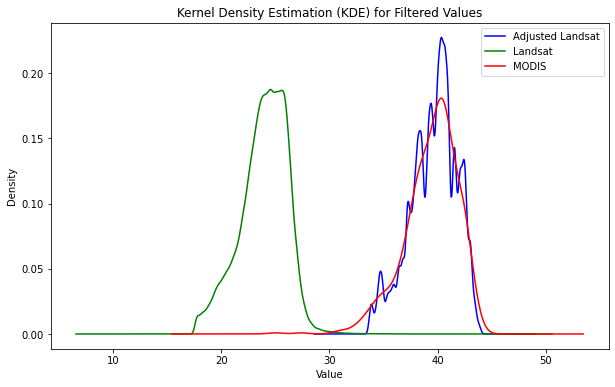

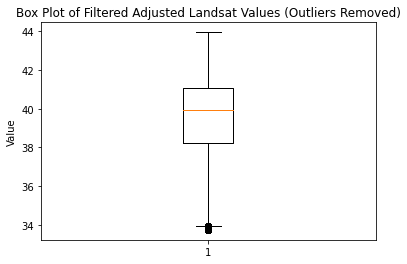

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the combined DataFrame (assuming it's already prepared)
combined_df = pd.read_excel(r'C:\Users\Redwan Kabir\Landsat_modis_conversion.xlsx')

# Calculate the IQR for the adjusted Landsat values
Q1 = combined_df['Adjusted_Landsat_Values'].quantile(0.25)
Q3 = combined_df['Adjusted_Landsat_Values'].quantile(0.75)
IQR = Q3 - Q1

# Define a lower and upper threshold for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filter out values outside the threshold range
filtered_df = combined_df[(combined_df['Adjusted_Landsat_Values'] >= lower_threshold) & (combined_df['Adjusted_Landsat_Values'] <= upper_threshold)]

# Create a single plot for Kernel Density Estimation (KDE)
plt.figure(figsize=(10, 6))

# KDE plot for Adjusted Landsat Values
plt.title('Kernel Density Estimation (KDE) for Filtered Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Plot the KDEs for each dataset
filtered_df['Adjusted_Landsat_Values'].plot.kde(label='Adjusted Landsat', color='blue')
filtered_df['Landsat_Values'].plot.kde(label='Landsat', color='green')
filtered_df['MODIS_Values'].plot.kde(label='MODIS', color='red')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Create a box plot of the filtered data to visualize outliers removal
plt.boxplot(filtered_df['Adjusted_Landsat_Values'])
plt.title('Box Plot of Filtered Adjusted Landsat Values (Outliers Removed)')
plt.ylabel('Value')
plt.show()

# Save the filtered DataFrame to a new Excel file
#filtered_df.to_excel('filtered_combined_data.xlsx', index=False)


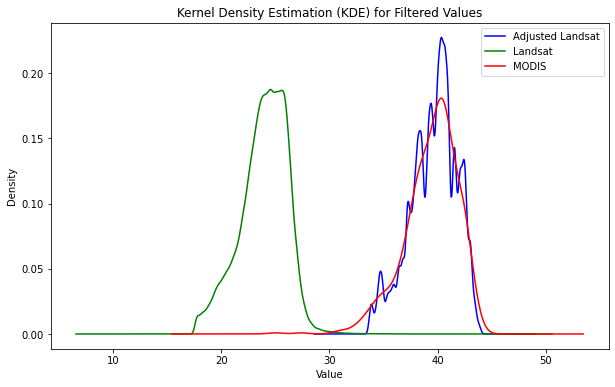

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the filtered combined DataFrame (assuming it's already prepared)
filtered_df = combined_df[(combined_df['Adjusted_Landsat_Values'] >= lower_threshold) & (combined_df['Adjusted_Landsat_Values'] <= upper_threshold)]


# Create a single plot for Kernel Density Estimation (KDE)
plt.figure(figsize=(10, 6))

# KDE plot for Adjusted Landsat Values
plt.title('Kernel Density Estimation (KDE) for Filtered Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Plot the KDEs for each dataset
filtered_df['Adjusted_Landsat_Values'].plot.kde(label='Adjusted Landsat', color='blue')
filtered_df['Landsat_Values'].plot.kde(label='Landsat', color='green')
filtered_df['MODIS_Values'].plot.kde(label='MODIS', color='red')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [49]:

# Save the filtered DataFrame to a new Excel file
filtered_df.to_excel('filtered_combined_data.xlsx', index=False)